In [18]:
from ansys.mapdl.core import launch_mapdl
import pandas as pd

def launch_mapdl_on_available_port(starting_port=50052, max_attempts=5):
    for i in range(max_attempts):
        port = starting_port + i
        try:
            mapdl = launch_mapdl(port=port)
            print(f"MAPDL launched successfully on port {port}")
            return mapdl
        except Exception as e:
            print(f"Failed to launch MAPDL on port {port}: {e}")
    raise RuntimeError("Could not launch MAPDL on any available port")

# Use a função para iniciar uma instância do MAPDL
mapdl = launch_mapdl_on_available_port()

MAPDL launched successfully on port 50052


In [181]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Definindo variáveis apenas uma vez
raio_estaca = 0.5
distancia = raio_estaca * 2.5  # 5 vezes o raio da estaca
largura = 6
altura = 3
distancia_minima = 2.5
n_estacas = 2
n_estacas_centrais = round(1) 

# Ângulos das estacas
angulos_1 = np.array([0, 0.333,0.666,1])
angulos_2 = np.array([0, 180])

# Comprimento das estacas
L_estacas = 20

def gerar_pontos(n, k):
    pontos = []
    tentativas = 0
    # Gerar n pontos dentro dos limites especificados
    while len(pontos) < n and tentativas < 1000000:
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = round(random.uniform(raio_estaca, altura - raio_estaca), 1)
        z = 0
        ponto = (x, y, z)
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
            tentativas = 0
        else:
            tentativas += 1
    pontos.sort(key=lambda x: x[0])
    
    # Gerar k pontos adicionais para o centro do dolphin
    for _ in range(k):
        x = round(random.uniform(raio_estaca, largura - raio_estaca), 1)
        y = 0
        z = 0
        ponto = (x, y, z)
        # Verificar se o ponto mantém a distância mínima em relação a todos os pontos já existentes
        if todos_os_pontos_distancia_minima(ponto, pontos):
            pontos.append(ponto)
        else:
            tentativas += 1
    if len(pontos) < n + k:
        return []
  
    # Organizar os pontos em ordem crescente de x
    pontos[len(pontos) - k:] = sorted(pontos[len(pontos) - k:], key=lambda x: x[0])

    return pontos

def todos_os_pontos_distancia_minima(ponto, pontos):
    for p in pontos:
        if distancia_entre_pontos(p, ponto) < distancia:
            return False
    return True

def distancia_entre_pontos(p1, p2):
    return math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)

def espelhar_pontos(pontos):
    espelho = [(x, -y , z) for x, y , z in pontos[:-int(n_estacas_centrais)]]
    return espelho


# Obrigar a geração de pontos iniciais
def gerar_npontos(n, k):
    i = 0
    pontos_iniciais = []
    
    while i < 10000 and not pontos_iniciais:
        pontos = gerar_pontos(n, k)
        espelhos = espelhar_pontos(pontos)
        pontos_iniciais = pontos + espelhos
        
        if pontos_iniciais:
            pontos_espelho = pontos + espelhos
        i += 1
    
    return pontos_iniciais, pontos_espelho, pontos

# Uso da função funcao_Objetivo
pontos_iniciais, pontos_espelho, pontos = gerar_npontos(int(n_estacas), int(n_estacas_centrais))
pontos_iniciais = np.array(pontos_iniciais)


def gerar_angulos_aleatorios_verticais(n_estacas, n_estacas_centrais):
    # Gerar angulos aleatorios para as estacas laterais
    x_v_1 = np.random.choice(angulos_1 , size=n_estacas) 
    angulos_vertical_1 = np.round(75 + 15 * x_v_1, 2) 
    
    # Gerar angulos aleatorios para as estacas centrais
    x_v_2 = np.random.choice(angulos_1 , size=n_estacas_centrais)
    angulo_central_aleatorio = np.round(75 + 15 * x_v_2, 2)

    # Armazenar os valores de x_variados
    array_angulos_vertical_1 = x_v_1.copy()  # Se você quiser manter uma cópia dos valores
    #print("Array angulos vertical 1:", array_angulos_vertical_1)
    array_angulos_vertical_2 = x_v_2.copy()  # Se você quiser manter uma cópia dos valores
    #print("Array angulos vertical 2:", array_angulos_vertical_2)

    angulos_verticais_theta = np.concatenate((angulos_vertical_1, angulo_central_aleatorio, angulos_vertical_1))
    angulos_verticais_k = np.concatenate((array_angulos_vertical_1, array_angulos_vertical_2))
    
    return angulos_verticais_theta, angulos_verticais_k


def gerar_angulos_aleatorios_horizontais(n_estacas, n_estacas_centrais):
    # Gerar angulos aleatorios para as estacas laterais
    x_h_1 = np.random.uniform(0, 1, size=n_estacas) 
    angulos_horizontal_1 = np.round(46 + 268*x_h_1,2)
    # Gerar angulos aleatorios para as estacas centrais
    x_h_2 = np.round(np.random.uniform(0, 1, size=n_estacas_centrais),0)
    angulos_horizontal_2 = np.round(180 * x_h_2,2)

    array_angulos_horizontal_1=x_h_1.copy()
    #print("Array angulos horizontal 1:",array_angulos_horizontal_1)
    array_angulos_horizontal_2=x_h_2.copy()
    #print("Array angulos horizontal 2:",array_angulos_horizontal_2)


    angulos_horizontais_theta = np.concatenate((angulos_horizontal_1, angulos_horizontal_2, -1 * angulos_horizontal_1))
    angulos_horizontais_k = np.concatenate((array_angulos_horizontal_1, array_angulos_horizontal_2.round(0)))
    return angulos_horizontais_theta,angulos_horizontais_k

angulos_horizontais_theta,angulos_horizontais_k = gerar_angulos_aleatorios_horizontais(int(n_estacas), int(n_estacas_centrais))
angulos_verticais_theta,angulos_verticais_k = gerar_angulos_aleatorios_verticais(int(n_estacas), int(n_estacas_centrais))
print("Array angulos horizontal ORIGINAIS:",angulos_horizontais_theta)
print("Array angulos horizontal ORIGINAIS K:",angulos_horizontais_k)
print("Array angulos vertical ORIGINAIS:", angulos_verticais_theta)
print("Array angulos vertical ORIGINAIS K:", angulos_verticais_k)


# A função spherical_to_cartesian já foi definida uma vez
def spherical_to_cartesian(x_inicial, y_inicial, z_inicial, L_estacas, angulos_verticais_theta, angulos_horizontais_theta):
    # Converter os ângulos de graus para radianos
    angulo_vertical_rad = np.deg2rad(angulos_verticais_theta)
    angulo_horizontal_rad = np.deg2rad(angulos_horizontais_theta)
    
    # Calcular os componentes do vetor nas direções X, Y e Z
    componente_x = L_estacas * np.cos(angulo_vertical_rad) * np.cos(angulo_horizontal_rad)
    componente_y = L_estacas * np.cos(angulo_vertical_rad) * np.sin(angulo_horizontal_rad)
    componente_z = L_estacas * np.sin(angulo_vertical_rad)
    # Calcular as coordenadas finais
    x_final = x_inicial + componente_x
    y_final = y_inicial + componente_y
    z_final = z_inicial + componente_z

    return x_final, y_final, z_final

def gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta):
    coordenadas_finais = []
    # Iterar por cada ponto inicial e seus ângulos correspondentes
    for i in range(len(pontos)):
        x, y, z = pontos[i]
        theta_v, theta_h = angulos_verticais_theta[i], angulos_horizontais_theta[i]
        x_final, y_final, z_final = spherical_to_cartesian(x, y, z, L_estacas, theta_v, theta_h)
        
        coordenadas_finais.append((round(x_final, 2), round(y_final, 2), -1*round(z_final, 2)))
    return coordenadas_finais

def espelhar_pontos_finais(pontos, k):
    espelho = []
    # Calcular os pontos espelhados, exceto para os últimos k pontos relacionados às estacas centrais
    for (x, y, z) in pontos[:-k]:
        y_espelhado = -y
        espelho.append((x, y_espelhado, z))
    return espelho

# Calcular as coordenadas finais para cada ponto inicial
coordenadas_finais = gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta)
espelhos_finais = espelhar_pontos_finais(coordenadas_finais, int(n_estacas_centrais))
pontos_finais = np.array(coordenadas_finais + espelhos_finais)

# Função para calcular a distância euclidiana entre dois pontos em R3
def distancia_entre_pontos_r3(p1, p2):
    return round(np.linalg.norm(p1 - p2), 2)

# Função para encontrar a menor distância entre os vetores correspondentes aos índices k e l
def encontrar_menor_distancia_entre_vetores(pontos_iniciais, pontos_finais, k, l, comprimento):

    vetor_k = pontos_finais[k] - pontos_iniciais[k]
    vetor_l = pontos_finais[l] - pontos_iniciais[l]

    vetor_dividido_k = vetor_k / comprimento
    vetor_dividido_l = vetor_l / comprimento

    menor_distancia = float('inf')
    ponto_menor_distancia_v1 = None
    ponto_menor_distancia_v2 = None
    N_v1 = None
    N_v2 = None

    for N1 in np.arange(1, 19, 1):
        for N2 in np.arange(1, 19, 1):
            ponto_v1 = pontos_iniciais[k] + N1 * vetor_dividido_k
            ponto_v2 = pontos_iniciais[l] + N2 * vetor_dividido_l

            dist = round(distancia_entre_pontos_r3(ponto_v1, ponto_v2), 2)

            if dist < menor_distancia:
                menor_distancia = dist
                ponto_menor_distancia_v1 = ponto_v1
                ponto_menor_distancia_v2 = ponto_v2
                N_v1 = N1
                N_v2 = N2

    return menor_distancia, ponto_menor_distancia_v1, ponto_menor_distancia_v2, N_v1, N_v2

def gerar_lista_k(angulos_verticais_k, n_estacas, n_estacas_centrais):
    # A lista de índices dos elementos do vetor (0-based)
    indices = list(range(len(angulos_verticais_k)))  # 0-based indexing
    
    # Obter os índices dos dois menores valores, excluindo o último índice
    indices_menores = sorted(range(len(angulos_verticais_k) - 1), key=lambda i: angulos_verticais_k[i])[:n_estacas]
    
    # Criar a lista k com os índices 0-based das duas menores grandezas
    lista_k = [i for i in indices_menores]
    
    # Adicionar o valor 2 (referente ao índice 2) no final da lista
    lista_k.append(2)
    
    # Garantir que o valor 2 não esteja duplicado
    if len(lista_k) < n_estacas + n_estacas_centrais and lista_k.count(2) < 2:
        lista_k.append(2)
    
    return lista_k


# Função para ajustar os pontos finais com base nas distâncias mínimas
def verificar_e_ajustar_pontos(pontos, L_estacas, distancia_minima, pontos_finais, max_iteracoes=11*(n_estacas+n_estacas_centrais+n_estacas)):
    iteracao = 0  # Contador de iterações para evitar loops infinitos
    pontos_finais = np.array(pontos_finais)
    x_h_new = 0 # Inicializar x_h_new como zero
    incremento = 0.1  # Valor a ser incrementado em x_h_new a cada tentativa de ajuste

    lista_k = gerar_lista_k(angulos_verticais_k, n_estacas, n_estacas_centrais)
    print("Lista K 1:", lista_k)
    print("Coprimento K:",len(lista_k))
    print("n_estacas K", n_estacas)

    for k in lista_k:
        print("Valor K", k)
        x_h_new = 0
        while True:
            ajustou_ponto = False  # Flag para verificar se o ponto foi ajustado

            for l in range(len(pontos_finais)):
                if k == l:
                    continue
                ponto1 = pontos_finais[k]
                ponto2 = pontos_finais[l]
                dist = distancia_entre_pontos_r3(ponto1, ponto2)
                menor_distancia, _, _, _, _ = encontrar_menor_distancia_entre_vetores(pontos, pontos_finais, k, l, L_estacas)
                # Controlar as distâncias mínimas entre pontos
                if menor_distancia < 3 * raio_estaca or dist < 5 * raio_estaca:
                    ajustou_ponto = True
                    # Verificar se o ponto atual é uma estaca central ou não
                   
                    if k <= n_estacas:
                        # Geração de novos ângulos horizontais para estacas não centrais
                        angulos_horizontais_theta[k] = np.round(314 - 268 * x_h_new, 2)  # Ajuste linear para 46° a 314°
                        angulos_horizontais_k[k] = np.round(x_h_new, 2)
                    else:
                        # Geração de novos ângulos horizontais para estacas centrais
                        angulos_horizontais_theta[k] = 180 * round(x_h_new, 0)  # Ajuste linear para 0° a 180°
                        angulos_horizontais_k[k] = round(x_h_new, 0)

                    # Calcular novas coordenadas finais
                    x_novo, y_novo, z_novo = spherical_to_cartesian(
                        pontos[k][0], pontos[k][1], pontos[k][2],
                        L_estacas, angulos_verticais_theta[k], angulos_horizontais_theta[k]
                    )
                    # Arredondar as coordenadas finais
                    x = np.round(x_novo, 2)
                    y = np.round(y_novo, 2)
                    z = -1*np.round(z_novo, 2)

                    # Atualizar as coordenadas finais do ponto original
                    if k < n_estacas:
                        pontos_finais[k, :] = [x, y, z]
                        pontos_finais[k + n_estacas + n_estacas_centrais, :] = [x, -y, z]
                    else:
                        pontos_finais[k, :] = [x, y, z]
                    break  # Saia do loop 'l' e recomece a verificação para o mesmo ponto 'k'

            if not ajustou_ponto:
                break  # Sai do loop 'while' e passa para o próximo ponto 'k'

            # Incrementar x_h_new para tentar novos ângulos na próxima iteração
            x_h_new += round(incremento,1)

            print(x_h_new)
            if np.round(x_h_new,1) >= 1.0:  # Se x_h_new passar de 1, reseta para zero
                x_h_new = 0.0

            iteracao += 1
            if iteracao >= max_iteracoes:
                print("Interações máximas atingidas")
                return []

    return pontos_finais, angulos_horizontais_theta, angulos_horizontais_k



def tentar_gerar_pontos_validos(n, k, L_estacas, distancia_minima, max_tentativas=100):
    tentativas = 0

    while tentativas < max_tentativas:
        tentativas += 1
        print(f"Tentativa: {tentativas}")
        
        # Gerar os pontos iniciais e seus espelhos
        pontos_iniciais, _, pontos = gerar_npontos(n, k)

        # Gerar os ângulos verticais e horizontais aleatórios
        angulos_horizontais_theta, angulos_horizontais_k = gerar_angulos_aleatorios_horizontais(n, k)
        angulos_verticais_theta, angulos_verticais_k = gerar_angulos_aleatorios_verticais(n, k)

        # Gerar as coordenadas finais dos pontos
        coordenadas_finais = gerar_pontos_finais(pontos, angulos_verticais_theta, angulos_horizontais_theta)
        espelhos_finais = espelhar_pontos_finais(coordenadas_finais, k)
        pontos_finais = np.array(coordenadas_finais + espelhos_finais)

        # Verificar e ajustar os pontos finais
        resultado_ajuste = verificar_e_ajustar_pontos(pontos_iniciais, L_estacas, distancia_minima, pontos_finais)
        
        if resultado_ajuste:
            pontos_finais_ajustados, angulos_horizontais_theta, angulos_horizontais_k = resultado_ajuste
            print("Pontos válidos gerados!")
            return pontos_iniciais, pontos_finais_ajustados, angulos_horizontais_theta, angulos_horizontais_k,angulos_verticais_theta,angulos_verticais_k
        
        print(f"Tentativa {tentativas} falhou. Tentando novamente...")

    raise ValueError("Não foi possível gerar pontos válidos após múltiplas tentativas.")


pontos_iniciais, pontos_finais_ajustados,angulos_horizontais_theta,angulos_horizontais_k,angulos_verticais_theta,angulos_verticais_k=tentar_gerar_pontos_validos(n_estacas,n_estacas_centrais,L_estacas,distancia_minima)


pontos_iniciais=np.array(pontos_iniciais)

pontos_finais_ajustados=np.array(pontos_finais_ajustados)
print(pontos_iniciais
)
print(pontos_finais_ajustados)
print("HORIZONTAIS")
print(angulos_horizontais_theta)
print(angulos_horizontais_k)

print("VERTIAIS")
print(angulos_verticais_theta)
print(angulos_verticais_k)



Array angulos horizontal ORIGINAIS: [ 241.37  112.94    0.   -241.37 -112.94]
Array angulos horizontal ORIGINAIS K: [0.72899596 0.24977238 0.        ]
Array angulos vertical ORIGINAIS: [80. 80. 80. 80. 80.]
Array angulos vertical ORIGINAIS K: [0.333 0.333 0.333]
Tentativa: 1
Lista K 1: [0, 1, 2]
Coprimento K: 3
n_estacas K 2
Valor K 0
Valor K 1
Valor K 2
Pontos válidos gerados!
[[ 1.2  1.5  0. ]
 [ 5.2  1.7  0. ]
 [ 3.2  0.   0. ]
 [ 1.2 -1.5  0. ]
 [ 5.2 -1.7  0. ]]
[[  0.2    2.93 -19.92]
 [  5.2    1.7  -20.  ]
 [  1.45   0.   -19.92]
 [  0.2   -2.93 -19.92]
 [  5.2   -1.7  -20.  ]]
HORIZONTAIS
[ 241.37  112.94    0.   -241.37 -112.94]
[0.72899596 0.24977238 0.        ]
VERTIAIS
[84.99 90.   84.99 84.99 90.  ]
[0.666 1.    0.666]


In [68]:
mapdl.clear('NOSTART')
mapdl.prep7()

# Título
mapdl.title('Análise de Estacas e Casca')

# Definir o tipo de elemento (BEAM188) e suas propriedades
mapdl.et(1, 'BEAM188')

# Propriedades do material
modulo_elasticidade = 0.85 * 5600 * (40 ** 0.5) * 1e6  # N/m²
mapdl.mp('EX', 1, modulo_elasticidade)
mapdl.mp('PRXY', 1, 0.2)  # Coeficiente de Poisson
mapdl.mp('DENS', 1, 2500)  # Densidade

# Propriedades da seção da viga
mapdl.sectype(1, 'BEAM', 'CSOLID')
mapdl.secoffset('CENT')
mapdl.secdata(0.5)

# Número de nós intermediários
num_intermediate_nodes = 39

# Adicionar nós
node_id = 1
for i in range(2*n_estacas+n_estacas_centrais):
    # Obter coordenadas iniciais e finais
    x_inicial, y_inicial, z_inicial = pontos_iniciais[i]
    x_final, y_final, z_final = pontos_finais_ajustados[i]
    
    # Criar o nó inicial
    mapdl.n(node_id, x_inicial, y_inicial, z_inicial)
    
    # Definir o ID do nó final
    node_id_final = node_id + num_intermediate_nodes + 1
    
    # Criar o nó final
    mapdl.n(node_id_final, x_final, y_final, z_final)
    
    # Travar o nó final
    mapdl.d(node_id_final, 'ALL', 0)
    
    # Preencher nós intermediários
    mapdl.fill(node_id, node_id_final, num_intermediate_nodes)
    
    # Atualizar o próximo node_id

    node_id = node_id_final + 1

# Geração de elementos
n_elemento = 1
for i in range(2*n_estacas+n_estacas_centrais):
    for j in range(1, num_intermediate_nodes + 2):
        N_1 = j + (num_intermediate_nodes + 2) * (i)
        N_2 = N_1 + 1
        mapdl.en(n_elemento, N_1, N_2)
        n_elemento += 1

# Selecionar elementos tipo BEAM188
mapdl.esel('S', 'TYPE', '', 1)

# Contar elementos selecionados
num_elem = mapdl.get('num_elem', 'ELEM', 0, 'COUNT')
k = num_elem

# Criar elemento de carga
mapdl.n(1000, 3, 0, 0)
mapdl.n(1001, 3, 0, 0.1)
mapdl.en(k + 1, 1000, 1001)

# Definir tipo de elemento SHELL181
mapdl.et(2, 'SHELL181')
mapdl.keyopt(2, 8, 2)  # Elastoplástico
mapdl.keyopt(2, 3, 2)  # Precisão de tensões

# Propriedades do material para SHELL181
modulo_elasticidade_shell = 0.85 * 5600 * (20 ** 0.5) * 1e6
mapdl.mp('EX', 2, modulo_elasticidade_shell)
mapdl.mp('PRXY', 2, 0.2)
mapdl.mp('DENS', 2, 2500)

# Definir seção de casca
mapdl.sectype(2, 'SHELL')
mapdl.secdata(1.5)

# Criar retângulo e malhar
mapdl.rectng(0, 6, -3, 3)
mapdl.esize(0.1)
mapdl.amesh('ALL')

# Selecionar elementos tipo SHELL181
mapdl.esel('S', 'TYPE', '', 2)
mapdl.emodif('ALL', 'SECNUM', 2)

# Merge de nós
mapdl.nsel('S', 'LOC', 'Z', 0, 1e5)
mapdl.nummrg('NODE', 1e-5)
mapdl.nsel('ALL')

# Saída dos resultados
mapdl.allsel('ALL')
#mapdl.nlist('ALL', '', '', 'XYZ', 'NODE', 'NODE', 'NODE')
#mapdl.elist('ALL', '', '', 0, 0)

# Aplicar gravidade
mapdl.acel(0, 0, -9.81)

# Finalizar
mapdl.finish() 

***** ROUTINE COMPLETED *****  CP =         0.188

In [69]:
# Entrar no modo de solução
mapdl.slashsolu()
mapdl.antype(0)

PERFORM A STATIC ANALYSIS
  THIS WILL BE A NEW ANALYSIS

In [70]:
import math
# Definir a força aplicada e o número de load steps
f = 1000000  # Força de 1 milhão de N

# Loop para aplicar as diferentes condições de carga
for i in range(1, 4):
    # Calcular o ângulo em radianos
    Rad = (i-1)*45*math.pi/180

    print(Rad)

    # Calcular as componentes da força horizontal
    FX = math.cos(Rad)*f
    FY = math.sin(Rad)*f

    print(FX)
    print(FY)

    # Selecionar todos os elementos
    mapdl.allsel('ALL')

    # Aplicar as forças horizontais no nó 1001
    mapdl.f(1001, 'FX', FX)
    mapdl.f(1001, 'FY', FY)

    # Resolver o modelo
    mapdl.solve()

    # Salvar os resultados da solução
    mapdl.save(f'load_step_{i}')

# Finalizar
mapdl.finish()

0.0
1000000.0
0.0
0.7853981633974483
707106.7811865476
707106.7811865476
1.5707963267948966
6.123233995736767e-11
1000000.0


FINISH SOLUTION PROCESSING


 ***** ROUTINE COMPLETED *****  CP =         1.734

In [71]:
# Entrar no modo de pós-processamento
mapdl.post1()

# Definir os Load Cases para N = 3
for i in range(1, 4):
    mapdl.lcdef(i, i, 1)  # Define o Load Case i para o Load Step i 

# Carregar o primeiro Load Case
mapdl.lcase(1)

# Comparar o Load Case 1 com os demais e armazenar os resultados (máximos)
for R in range(2, 4): 
    mapdl.lcoper('MAX', R)  # Compara o Load Case na memória com os próximos
    mapdl.lcwrite(50 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(53)

# Gerar ETABLE para momentos fletores My e Mz dos elementos selecionados (valores máximos)
mapdl.etable('Fx_MAX', 'SMISC', 1, 'MAX')  # Força Axial máxima
mapdl.etable('My_MAX', 'SMISC', 2, 'MAX')  # Momento fletor máximo em Y
mapdl.etable('Mz_MAX', 'SMISC', 3, 'MAX')  # Momento fletor máximo em Z
mapdl.etable('BiMomt_MAX', 'SMISC', 27, 'MAX')  # Momento fletor máximo em Z
#Gerar ETABLE para deslocamentos dos nós selecionados
mapdl.etable('UX', 'U', 'X')  # Deslocamento em X
mapdl.etable('UY', 'U', 'Y')  # Deslocamento em Y
mapdl.etable('UZ', 'U', 'Z')  # Deslocamento em Z

# Carregar o primeiro Load Case novamente
mapdl.lcase(1)

# Comparar o Load Case 1 com os demais para valores mínimos
for R in range(2, 4):
    mapdl.lcoper('MIN', R)  # Compara o Load Case na memória para valores mínimos
    mapdl.lcwrite(60 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(63)

# Gerar ETABLE para momentos fletores e força axial (valores mínimos)
mapdl.etable('Fx_MIN', 'SMISC', 1, 'MIN')  # Força Axial mínima




STORE FX_MIN   FROM ITEM=SMIS COMP=   1  FOR ALL SELECTED ELEMENTS
 WITH MIN ELEMENT NODAL VALUE

In [72]:

# Entrar no modo de pós-processamento
mapdl.post1()
# Definir os Load Cases para N = 3
for i in range(1, 4):
    mapdl.lcdef(i, i, 1)  # Define o Load Case i para o Load Step i 
# Carregar o primeiro Load Case
mapdl.lcase(1)

#!!!!!!!!!!!!!!!!!!!!!CÁLCULO DO MAX!!!!!!!!!!!!!!!!!!!!!
# Comparar o Load Case 1 com os demais e armazenar os resultados (máximos)
for R in range(2, 4): 
    mapdl.lcoper('MAX', R)  # Compara o Load Case na memória com os próximos
    mapdl.lcwrite(50 + R)   # Escreve o resultado em um arquivo
# Carregar o resultado do último load case comparado
mapdl.lcase(53)
# Gerar ETABLE para momentos Fx max
mapdl.etable('Fx_MAX', 'SMISC', 1, 'MAX')  # Força Axial máxima

#!!!!!!!!!!!!!!!!!!!!!CÁLCULO DO MIN!!!!!!!!!!!!!!!!!!!!!
# Carregar o primeiro Load Case novamente
mapdl.lcase(1)
# Comparar o Load Case 1 com os demais para valores mínimos
for R in range(2, 4):
    mapdl.lcoper('MIN', R)  # Compara o Load Case na memória para valores mínimos
    mapdl.lcwrite(60 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(63)
# Gerar ETABLE para momentos Fx min
mapdl.etable('Fx_MIN', 'SMISC', 1, 'MIN')  # Força Axial mínima

#!!!!!!!!!!!!!!!!!!!!!CÁLCULO DO ABSMAX!!!!!!!!!!!!!!!!!!!!!
# Carregar o primeiro Load Case
mapdl.lcase(1)
# Comparar o Load Case 1 com os demais e armazenar os resultados (máximos)
for R in range(2, 4): 
    mapdl.lcoper('ABMX', R)  # Compara o Load Case na memória com os próximos
    mapdl.lcwrite(50 + R)   # Escreve o resultado em um arquivo

# Carregar o resultado do último load case comparado
mapdl.lcase(53)
# Gerar ETABLE para momentos fletores My e Mz dos elementos selecionados e seus deslocamentos máximos(valores máximos abs)
mapdl.etable('My_ABMX', 'SMISC', 2, 'ABMX')  # Momento fletor máximo em Y
mapdl.etable('Mz_ABMX', 'SMISC', 3, 'ABMX')  # Momento fletor máximo em Z
#Gerar ETABLE para deslocamentos dos nós selecionados
mapdl.etable('UX', 'U', 'X')  # Deslocamento em X
mapdl.etable('UY', 'U', 'Y')  # Deslocamento em Y
mapdl.etable('UZ', 'U', 'Z')  # Deslocamento em Z

STORE UZ       FROM ITEM=U    COMP=Z     FOR ALL SELECTED ELEMENTS

In [73]:
import pandas as pd
import math

# Definir a sequência de elementos
elementos_sequencia = []
j=1
for i in range(0,(2*n_estacas)+n_estacas_centrais, 1):
    y=num_intermediate_nodes*i + j
    elementos_sequencia.append(y)
    #elementos_sequencia.append(y+num_intermediate_nodes)         # Adiciona o primeiro elemento do intervalo
    j +=1

# Dicionário para armazenar os resultados
data = {
    "Fx_MAX": [],
    "Fx_MIN": [],
    "My_MAX": [],
    "Mz_MAX": [],
    "Utot": [],
    "My": [],  # Adicionando My
    "Mz": [],  # Adicionando Mz
    "r_max": [],  # Armazenar o maior valor de r para cada elemento
    "Element": []
}

# Primeiro loop: Calculando Fx_MAX, Fx_MIN e Utot para cada elemento
for elem in elementos_sequencia:
    fx_max = mapdl.get_value('ELEM', elem, 'ETABLE', 'Fx_MAX') / 1000  # kN
    fx_min = mapdl.get_value('ELEM', elem, 'ETABLE', 'Fx_MIN') / 1000  # kN
    my_max = mapdl.get_value('ELEM', elem, 'ETABLE', 'My_MAX')/1000 #kN*m
    mz_max = mapdl.get_value('ELEM', elem, 'ETABLE', 'Mz_MAX')/1000 #kN*m
    ux = mapdl.get_value('ELEM', elem, 'ETABLE', 'UX') * 1000  # mm
    uy = mapdl.get_value('ELEM', elem, 'ETABLE', 'UY') * 1000  # mm
    uz = mapdl.get_value('ELEM', elem, 'ETABLE', 'UZ') * 1000  # mm
    Utot = math.sqrt(ux**2 + uy**2 + uz**2)

    # Adicionando os valores calculados ao dicionário
    data["Fx_MAX"].append(fx_max)
    data["Fx_MIN"].append(fx_min)
    data["My_MAX"].append(my_max)
    data["Mz_MAX"].append(mz_max)
    data["Utot"].append(Utot)
    data["Element"].append(elem)

# Segundo loop: Calculando r_max, My, e Mz para cada elemento em todos os load cases
for elem in elementos_sequencia:
    # Variáveis para armazenar os maiores valores para este elemento
    r_max_elem = 0
    my_max_elem = 0
    mz_max_elem = 0
    
    # Iterar por cada load case para calcular `R` e armazenar o valor correspondente
    for load_case in range(1, 4):
        # Carregar o load case atual
        mapdl.lcase(load_case)
        
        # Gerar ETABLE para momentos fletores My e Mz para o load case atual
        mapdl.etable('My', 'SMISC', 2)  # Momento fletor em Y
        mapdl.etable('Mz', 'SMISC', 3)  # Momento fletor em Z

        # Extraindo os valores de My e Mz
        my_val = mapdl.get_value('ELEM', elem, 'ETABLE', 'My')/1000
        mz_val = mapdl.get_value('ELEM', elem, 'ETABLE', 'Mz')/1000
        
        # Calcular o valor de R no Python
        r_val = math.sqrt(my_val**2 + mz_val**2)   # Normalizar em kN

        # Verificar se o valor atual de r é o maior já registrado para este elemento
        if r_val > r_max_elem:
            r_max_elem = r_val
            my_max_elem = my_val
            mz_max_elem = mz_val
    # Adicionando os maiores valores encontrados ao dicionário
    data["My"].append(my_max_elem)
    data["Mz"].append(mz_max_elem)
    data["r_max"].append(r_max_elem)

# Criando o DataFrame com os resultados
df = pd.DataFrame(data)

# Arredondando os valores para uma casa decimal
df = df.round(1)

# Definindo a função logística modificada para fazer a transição em ambos os lados de x=0
def f(x):
    if x <= 0 and x >= -1:
        # Transição suave de -150 para 0 utilizando uma função quadrática
        return (750/4/5) * (1 + x)**2-(750/4/5)
    elif x > 0:
        # Transição suave para 750 de forma exponencial
        return (750/4) * (1 - np.exp(-0.1 * x))
    else:
        return np.nan  # Valores fora do intervalo especificado


# Parâmetros para os cálculos
delta1 = 5500 # Axial (tracao) - kN
delta2 = 2000 # Axial (compr) - kN
delta3 = 2500 # Momento result (kN.m)
delta4 = 125  # Deslocamento - Utotal (mm)

# Função para calcular Pt considerando módulo e somar todos os Pt em um único resultado
def calcular_Pt(df):
    df['Pt_Fx_MAX'] = 0.0
    df['Pt_Fx_MIN'] = 0.0
    df['Pt_r_max'] = 0.0  # Nova coluna para a soma de My_MAX e Mz_MAX
    df['Pt_Utot'] = 0.0

    # Variável para armazenar a soma total de todos os Pt
    p_total = 40000

    for index, row in df.iterrows():
        # Cálculo para Fx_MAX
        if row['Fx_MAX'] > 0:
            df.at[index, 'Pt_Fx_MAX'] = f((abs(row['Fx_MAX']) - delta1) / delta1)
        else:
            df.at[index, 'Pt_Fx_MAX'] = f((abs(row['Fx_MAX']) - delta2) / delta2)

        # Cálculo para Fx_MIN
        if row['Fx_MIN'] > 0:
            df.at[index, 'Pt_Fx_MIN'] = f(((abs(row['Fx_MIN']) - delta1) / delta1))
        else:
            df.at[index, 'Pt_Fx_MIN'] = f(((abs(row['Fx_MIN']) - delta2)/ delta2))

        # Cálculo de Pt_r_max 
        df.at[index, 'Pt_r_max'] = f(((abs(row['r_max'])  - delta3) / delta3))

        # Cálculo para Utot
        df.at[index, 'Pt_Utot'] = f(((abs(row['Utot']) - delta4) / delta4))


        # Soma total acumulando todos os Pt de cada iteração
        p_total += (df.at[index, 'Pt_Fx_MAX'] + df.at[index, 'Pt_Fx_MIN'] +
                    df.at[index, 'Pt_r_max'] + df.at[index, 'Pt_Utot'])

    return df, p_total.round(1)

# Aplicando a função ao DataFrame e retornando o total acumulado
df, p_total = calcular_Pt(df)

# Mostrando o DataFrame atualizado e o resultado do total acumulado
df,p_total


(   Fx_MAX  Fx_MIN  My_MAX  Mz_MAX  Utot     My     Mz  r_max  Element  \
 0  2079.7  1332.5  -230.3    32.2  24.1 -352.1  -95.4  364.8        1   
 1   113.3 -1063.7   -37.4   410.1  21.3 -282.6  410.1  498.1       41   
 2    54.6 -2354.8    82.5     6.8  18.4  -79.6 -120.0  144.0       81   
 3  1539.7  -745.3    -6.5   302.2  14.4  -23.2  302.2  303.1      121   
 4  1820.9   463.9  -131.5   120.3  10.8 -267.4  118.9  292.6      161   
 
    Pt_Fx_MAX  Pt_Fx_MIN   Pt_r_max    Pt_Utot  
 0 -32.138241 -35.298897 -36.701526 -36.106056  
 1 -37.484086 -26.892584 -36.011378 -36.411144  
 2 -37.496304   3.296920 -37.375584 -36.687456  
 3 -34.561145 -32.292449 -36.948782 -37.002336  
 4 -33.389657 -37.233219 -36.986311 -37.220064  ,
 39329.1)

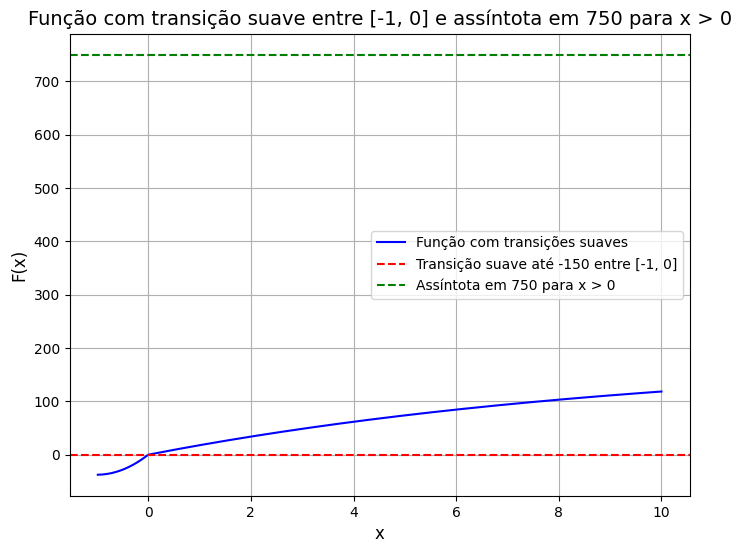

In [74]:
# Ajustando a função para fazer a transição suave entre -1 e 0, e para valores maiores que 0
def F_modified(x):
    if x <= 0 and x >= -1:
        # Transição suave de -150 para 0 utilizando uma função quadrática
        return (750/4/5) * (1 + x)**2-(750/4/5)
    elif x > 0:
        # Transição suave para 750 de forma exponencial
        return (750/4) * (1 - np.exp(-0.1 * x))
    else:
        return np.nan  # Valores fora do intervalo especificado

# Gerando os valores de x para o gráfico
x_values = np.linspace(-1.5, 10, 400)
y_values = [F_modified(x) for x in x_values]

# Plotando a função
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label=r'Função com transições suaves', color='b')
plt.title('Função com transição suave entre [-1, 0] e assíntota em 750 para x > 0', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('F(x)', fontsize=12)
plt.grid(True)
plt.axhline(y=0, color='r', linestyle='--', label='Transição suave até -150 entre [-1, 0]')
plt.axhline(y=750, color='g', linestyle='--', label='Assíntota em 750 para x > 0')
plt.legend(loc='best')
plt.show()


In [75]:
mapdl.eplot()

Widget(value='<iframe src="http://localhost:54757/index.html?ui=P_0x1d3a20c92e0_1&reconnect=auto" class="pyvis…

In [76]:
#Sair da port do mapdl e fechar o processo
mapdl.exit()